#  Binary reponses

### Econometrics B (ØkB)

Wooldridge (2010, Ch. 15)

Bertel Schjerning

Department of Economics, University of Copenhagen


### Binary response

Numerous applications with binary outcomes, $y\in \{0,1\}$:

- a individual decides whether to participate in the labor force
- a consumer decides whether to buy a car
- a commuter decides whether to take public transit
- a household decides whether to move residence
- a high school student decides whether to attend a college
- a firm decides whether to enter/exit a market, invest, export, issue a patent, etc.  
- a student deciding whether to take the exam

Binary reposes are often involved as part of econometric models: corner solution outcomes, censored regression, sample selection, discrete-continuous choice, duration models 

## Plan for binary response

1. **Introduction to Binary response**
    * Linear Probability Model (LPM)
    * Latent Variable Model (LVM) 
1. Specification issues in binary response models

1. Panel data models for binary response
    * State dependence, initial conditions, fixed/random effects
1. Unordered discrete response 
    * Random utility model (RUM)
1. Ordered discrete response
    * Latent variable model with multiple threshold


### Binary Response
**Response probability**

\begin{equation*}
p\left( \mathbf{x}\right) \equiv P\left( y=1|\mathbf{x}\right) 
=P\left( y=1|x_{1},x_{2},..,x_{K}\right) 
\end{equation*}

where 
- $y\in \left \{ 0,1\right \} $ is a binary endogenous random variable
- $\mathbf{x} \equiv (x_{1},x_{2},..,x_{K})$ is a vector vector of exogenous explanatory variables

For a **continuous** $x_{j}$ we may be interested in

\begin{equation*}
\frac{P\left( y=1|\mathbf{x}\right) }{\partial x_{j}}
=\frac{\partial p\left( \mathbf{x}\right) }{\partial x_{j}}
\end{equation*}

For a **binary** $x_{K}$, interest lies in
\begin{equation*}
P\left( y=1|x_{1},x_{2},..,x_{K-1},1\right) -P\left(
y=1|x_{1},x_{2},..,x_{K-1},0\right) 
\end{equation*}

**Partial effects** depends on $\mathbf{x}$ due to the non-linearity of $p(\mathbf{x})$
  

### Conditional distribution

* $y\in\{0,1\}$ is Bernoulli distributed conditional on the explanatory variables, $x$

* The **conditional distribution**, $f(y|x)$, of $y$ given $x$ can be summarized by
\begin{eqnarray*}
p(x) \equiv P(y=1|x) \text{,  } \quad 
P(y=0|x) =1-p(x) 
\end{eqnarray*}
So that
\begin{eqnarray*}
f(y|x) =p(x)^{y}[1-p(x) ]^{1-y} \\
\end{eqnarray*}

* The two fist conditional moments are

\begin{eqnarray*}
E\left[ y|x\right] &=&p(x) \\
Var\left( y|x\right) &=&p(x) \left[ 1-p(x) \right] 
\end{eqnarray*}


### **How to specify and estimate $p(x)$**?

* **Parametric model:** Suppose $p( x) =G( x,\beta_0) $, with $G(\cdot)$ known up to parameters, $\beta_0$

* **Data:** Assume random sample $\left\{ y_{i},x_{i}\right\}
_{i=1,..,N}$ where the unit $i$ is randomly chosen.


* **Estimation:**  If model is identified, we can then estimate $\beta_0$ using data on $y$ and $x$
    * MLE using $f(y|x;\beta_0)=G( x,\beta_0) ^{y}[
    1-G( x,\beta_0) ] ^{1-y}$
    \begin{equation*}
    \hat{\beta}_{MLE}=\arg \max_{\beta }\frac{1}{N}\sum_{i=1}^{N}
    \log f(y_i|x_i;\beta)
    \end{equation*}
    * NLS using $E[y|x]=G( x,\beta_0)$
    \begin{equation*}
    \hat{\beta}_{NLS}=\arg \min_{\beta }\frac{1}{N}\sum_{i=1}^{N}\left(
    y_{i}-G\left( x_i,\beta \right) \right) ^{2}
    \end{equation*}






### MLE or NLS?
* MLE is asymptotically efficient: 
    * We use all information about the distribution, $f( y|x;\beta_0)$
    * ......but is inconsistent if distribution is misspecified
    * NLS only use first moment $E[y|x]$

* Sometimes NLS is more robust than MLE
* Not the case here: 
    * if the the model for the conditional density $f( y|x;\beta_0)$ is misspecified
    * .... the regression model $E[ y|x] =G( x,\beta_0)$ is misspecified too
    * works through $G( x,\beta_0)$
    * if MLE is inconsistent, NLS is too 




### How to specify $G(x,\beta_0)$?

Parametric specifications
1. Linear probability model, $P(y=1|x)=G(x,\beta_0)=x\beta_0$
2. Linear index models, $P(y=1|x)=G(x\beta_0)$ with $0<G(z)<1$ 
3. More general parametric models are feasible, $P(y=1|x)=G(x,\beta_0)$

G often often motivated by latent variable model or the random utility model. 

### Linear probability model (LPM)

\begin{equation*}
P(y=1|x)=E(y|x)=G(x,\beta_0) =x\beta_0
\end{equation*}

Advantages: 
* LPM is a Linear regression model
* Can be estimated using OLS    
\begin{equation*}
\hat{\beta}=(x'x)^{-1}x'y
\end{equation*}
* Often good approximation of average partial effects (APE)


Issues: 
* model for $p\left( x\right) $ is not restricted to the unit interval 
* heteroscedasticity (conditional variance depends on x) 
\begin{equation*}
Var\left( y|x\right) =x\beta _{0}\left[ 1-x\beta _{0}%
\right] 
\end{equation*}
* heteroscedasticity $\rightarrow$ OLS is inefficient and OLS standard errors are invalid
* negative variance if predicted values is outside unit interval - WLS is not possible
* use heteroscedasticity robust variance matrix (see 12.52 for NLS)


### Import libraries

In [1]:
# install if not yet installed
!pip install tabulate
!pip install wooldridge
!pip install statsmodels

import numpy as np
from tabulate import tabulate
import numpy.random as random
from scipy.stats import norm
import matplotlib.pyplot as plt
from numpy import linalg as la
import statsmodels.api as sm

### Simulate data from binary response model and estimate LPM 

In [2]:
# Simulate binary reponse data 
n=10000 # Number of observations
beta=np.array([[0,1]]).T # parameters
rng=random.default_rng(seed=43);
x1 = rng.normal(0, 1, (n,len(beta)-1)) 
const=np.ones((n,1))
x_sim=np.concatenate((const, x1), axis=1)

def sim_y(x,  # exogenous variables
    beta,  # slope coefficient
    rng=random.default_rng()):
    
    beta=np.array(beta).reshape(-1,1)
    k=beta.shape[0]
    u = rng.normal(0, 1, (n,1))
    y=1.0*(x@beta + u > 0);
    
    return y; 

y_sim= sim_y(x_sim, beta, rng)


### Plot data, response probability fit, conditional variance 

In [3]:
def plot_lpmfit(y, x, beta): 
    fig, axs = plt.subplots(1, 3, figsize=(16,5))
    bhat=la.inv(x.T@x)@x.T@y
    x1_grid=np.linspace(-2, 2,100);  # grid over x (for plotting)
    fig.tight_layout(pad=3.0)
    
    # plot 1: LPM fit in scatter plot
    axs[0].scatter(x[:,1], y);
    axs[0].plot(x1_grid, bhat[0] +x1_grid*bhat[1])
    axs[0].set(xlabel='x1', ylabel='y', title='Model fit vs data'); 
    axs[0].legend(('LPM fit','y'), loc='lower right')

    # plot 2: true cdf and linear probility fit
    axs[1].plot(x1_grid, norm.cdf(beta[0] +x1_grid*beta[1])) # true
    axs[1].plot(x1_grid, bhat[0] +x1_grid*bhat[1]) # LPM fit
    axs[1].set(xlabel='x1', ylabel='P(y=1|x1)', title='LPM fit vs P(y=1|x)'); 
    axs[1].legend(('True', 'LPM fit'), loc='lower right')

    # plot 3: squared residuals and Var(y,x)
    xbhat=(bhat[0] +x[:,1]*bhat[1])  # predicted probability
    axs[2].scatter(x[:,1], xbhat*(1-xbhat))      # plot squared residuals
    axs[2].set(xlabel='x1', ylabel='Var(y|x)', title='Var(y|x)'); 


### Graphical illustration of issues wth LPM
* Predicted probability $P(y=1|x)=x\beta$ not restricted to unit interval
* Conditional variance $Var(y|x)=x\beta(1-x\beta)$ depends on x (heteroscedasticity) 
* LPM predicts negative variance (in areas with $x\beta$ outside unit interval)

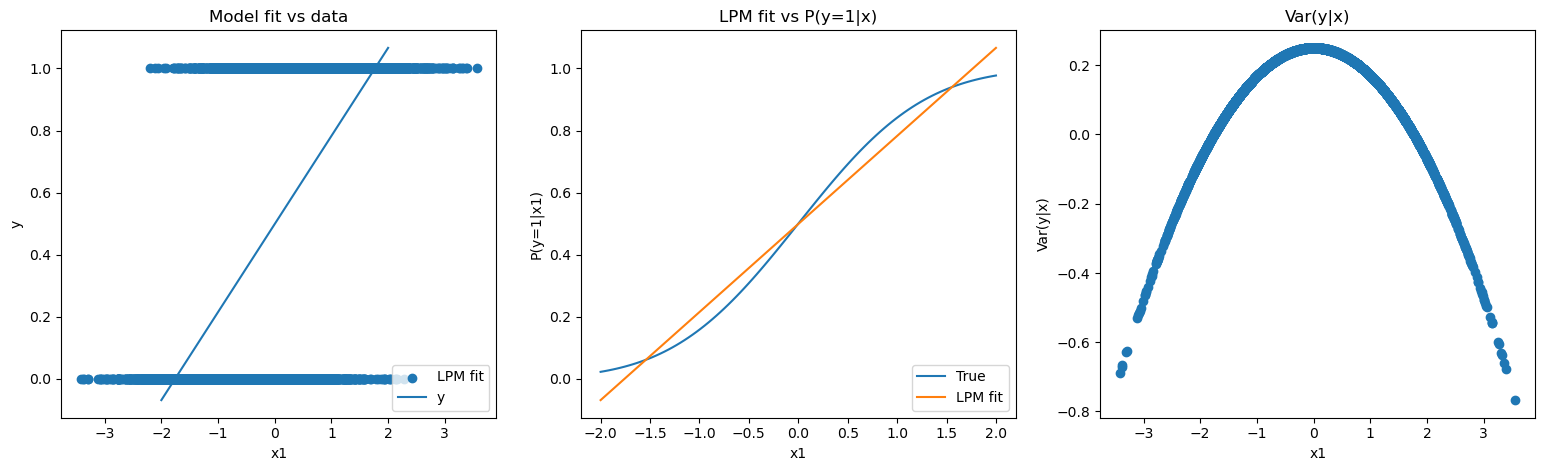

In [4]:
plot_lpmfit(y_sim, x_sim, beta)

### Replicate results on Married women's labor force participation
(Example 15.1 Wooldridge (p. 563-564))

Read in data and summarize key variables


In [5]:
import wooldridge
df = wooldridge.data('mroz')
y = df['inlf'] # binary response variable: Labor force participation
xvars=['nwifeinc','educ', 'exper','expersq','age', 'kidslt6', 'kidsge6']
x = sm.add_constant(df[xvars])
df[['inlf']+xvars].describe()

,inlf,nwifeinc,educ,exper,expersq,age,kidslt6,kidsge6
count,753.000000,753.000000,753.000000,753.00000,753.000000,753.000000,753.000000,753.000000
mean,0.568393,20.128964,12.286853,10.63081,178.038513,42.537849,0.237716,1.353254
std,0.495630,11.634797,2.280246,8.06913,249.630849,8.072574,0.523959,1.319874
min,0.000000,-0.029057,5.000000,0.00000,0.000000,30.000000,0.000000,0.000000
25%,0.000000,13.025040,12.000000,4.00000,16.000000,36.000000,0.000000,0.000000
50%,1.000000,17.700001,12.000000,9.00000,81.000000,43.000000,0.000000,1.000000
75%,1.000000,24.466000,13.000000,15.00000,225.000000,49.000000,0.000000,2.000000
max,1.000000,96.000000,17.000000,45.00000,2025.000000,60.000000,3.000000,8.000000


### Modeling married women's Labor force participation using LPM
- Estimator for lpm is very simple (OLS)
- Need to use heteroscedasticity robust standard errors (nice exercise)

In [6]:
bhat_lpm=la.inv(x.T@x)@x.T@y
print(tabulate({"":x.columns,"bhat (LMP)": bhat_lpm}, headers="keys"))

            bhat (LMP)
--------  ------------
const      0.585519
nwifeinc  -0.00340517
educ       0.0379953
exper      0.0394924
expersq   -0.000596312
age       -0.0160908
kidslt6   -0.26181
kidsge6    0.0130122


In [7]:
# You can also estimate linear regression models using canned routines from statsmodels
# See https://www.statsmodels.org/stable/index.html
mod = sm.OLS(y, x)
out_lpm = mod.fit(cov_type='HC0') # use heteroscedasticity robust standard errors (HC0)
print(out_lpm.summary())

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     63.15
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           3.02e-71
Time:                        09:00:54   Log-Likelihood:                -423.89
No. Observations:                 753   AIC:                             863.8
Df Residuals:                     745   BIC:                             900.8
Df Model:                           7                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5855      0.151      3.866      0.0

### Latent Variable Model (LVM)

**Latent outcome variable, $y^*$**
\begin{equation*}
y^*=x\beta _{0}+\varepsilon
\end{equation*}



**Observed outcome variable, $y \in {0,1}$**
\begin{equation*}
y = \mathbb{1}\left(y^{\ast }>0\right)
\end{equation*}


**Response probability**
\begin{eqnarray*}
P(y=1|x) &=& P( y^{*}>0|x)  \\
&=&  P(\varepsilon >-x\beta_{0}|x) \\
&=&1-P(\varepsilon <-x\beta_{0}|x) \\
&=&1-G( -x\beta _{0}) \text{... $G$ is CDF of $\varepsilon$ conditional on $x$} \\
&=&  G( x\beta _{0})  \text{... if $G$ is symmetric around zero}
\end{eqnarray*}


### Symmetric distribution
![title](img/symmetric.png)

### Identification Issues
**$\beta$ cannot be identified in the latent variable model**

\begin{eqnarray*}
    P\left( y=1|x\right) &=&P\left( xc\beta _{0}+c\varepsilon >0|x\right) \\ 
    &=&P\left( x\beta _{0}+\varepsilon >0|x\right)  
\end{eqnarray*}

* Choice probability $P\left( y=1|x\right) $ does not change if e.g. $\tilde{\beta}=c\beta _{0}$, $\tilde{\varepsilon}=c\varepsilon $ 
* Sample objective function can be maximized for a continuum of values of $c$
* $\beta _{0}$ is only identified up to a scale factor. 

**Solution:** Normalize distribution of $\varepsilon $ by for example by assuming fixed variance




### Identification - Probit Example

**Latent variable model with normal errors**

\begin{eqnarray*}
y=\mathbb{1}(x\beta _{0}+\varepsilon >0) \\
\varepsilon|x \sim N\left( 0,\sigma _{0}^{2}\right) 
\end{eqnarray*}

**Response probability**

\begin{eqnarray*}
P(y=1|x) &=&  P(\varepsilon >-x\beta_{0}|x) \\
&=&1-P(\varepsilon <-x\beta_{0}|x) \\
&=&1-P(\varepsilon/\sigma_0 <-x\beta_{0}/\sigma_0|x) \\
&=&1-\Phi( -x\beta _{0}/\sigma_0) \text{.... since $\varepsilon/\sigma_0 \sim N(0,1)$} \\
&=&  \Phi( x\beta _{0}/\sigma_0)  \text{... since normal distribution is  symmetric around zero} \\
\end{eqnarray*}

* only the relative size of $\beta_{0}/\sigma _{0}=c\beta _{0}/c\sigma _{0}$ matters for the response probability and thus for the likelihood

* therefore $\beta _{0}$ and $\sigma _{0}$ cannot be separately identified - only relative size $\beta _{0}/\sigma _{0}$ 


### Identification - Probit Example
* We usually make the scale normalization $Var\left( \varepsilon|x\right)=\sigma _{0}=1$

\begin{equation*}
	P\left( y=1|x\right) =\Phi \left( x\beta \right) \text{ where }\beta =\beta _{0}/\sigma _{0}
\end{equation*}

- After the normalization $\beta $ is identified.
- Important to have in mind when interpreting $\beta $ in binary choice models
- Effect of $x$ *seems* smaller when $Var\left( \varepsilon|x\right) $ is large
* If $\beta=\beta _{0}/\sigma _{0}$ is identifiable, so is the relative size of two coefficients $x_l$ and $x_k$ 
$$\frac{\beta^l _{0}/\sigma _{0}}{\beta^k _{0}/\sigma _{0}}
=\frac{\beta^l _{0}}{\beta^k _{0}}
$$

### Probit and Logit are two very popular specifications of G

**Probit:** G is the CDF of the standard *normal* distribution

$$G(z)=\Phi(z)$$

whose derivative is the standard normal density

\begin{eqnarray*}g(z)&=&d\Phi(z)/dz=\phi(z)\\
&=&(2\pi)^{-1/2}\exp(-z^2/2)
\end{eqnarray*}

**Logit:** G is the CDF of the standard *logistic* distribution

$$G(z)=\Lambda(z)=\frac{\exp(z)}{1+\exp(z)}=\frac{1}{1+\exp(-z)}$$

whose derivative is the standard logistic density

$$g(z)=d\Lambda(z)/dz=\exp(z)/[1+\exp(z)]^2=\exp(-z)/[1+\exp(-z)]^2$$


### Python Implementation 

In [8]:
def G(z, model='probit'):
    # Index function for probit and logit models
    if model=='probit':
        return norm.cdf(z)
    elif model=='logit':
        return 1/(1+np.exp(-z))

def g(z, model='probit'):
    # Derivative: g(z)=dG(z)/dz
    if model=='probit':
        return norm.pdf(z)
    elif model=='logit':
        z=-np.abs(z) # use transformation to avoid overflow (ok since g is symmetric)
        return np.exp(z)/(1+np.exp(z))**2

### Some graphs 
(output: see next slide)

In [9]:
def plot_G(scale=1): 
    # If scale=1 plot_G plots the cdf and pdf for standard normal and standard logistic
    # If scale is specified, variance of logistic distribution is scaled by 1/scale. '
    # If scale=1/(np.pi/np.sqrt(3)) the variance of logistic is 1 (like standard normal)
    # If scale=0.25/0.4, logistic is calibrated to have identical density at z=0. i.e. g(0)=0.4 (like standard normal, 0.25 for standard logistic)

    fig, axs = plt.subplots(1, 2, figsize=(16,8))
    z=np.linspace(-4,4,100);  # grid over z (for plotting)
    fig.tight_layout(pad=3.0)
    
    # plot 1: CDF Logit and Probit
    axs[0].plot(z, G(z, 'probit')) 
    axs[0].plot(z, G(z/scale, 'logit')) 
    axs[0].set(xlabel='z', ylabel='G(z)', title='CDF'); 
    axs[0].legend(('Probit', 'Logit'), loc='lower right')

    # plot 2: PDF Logit and Probit
    axs[1].plot(z, g(z, 'probit')) 
    axs[1].plot(z, 1/scale*g(z/scale, 'logit')) 
    axs[1].set(xlabel='z', ylabel='g(z)', title='PDF'); 
    axs[1].legend(('Probit', 'Logit'), loc='lower right')

### Unscaled distributions 

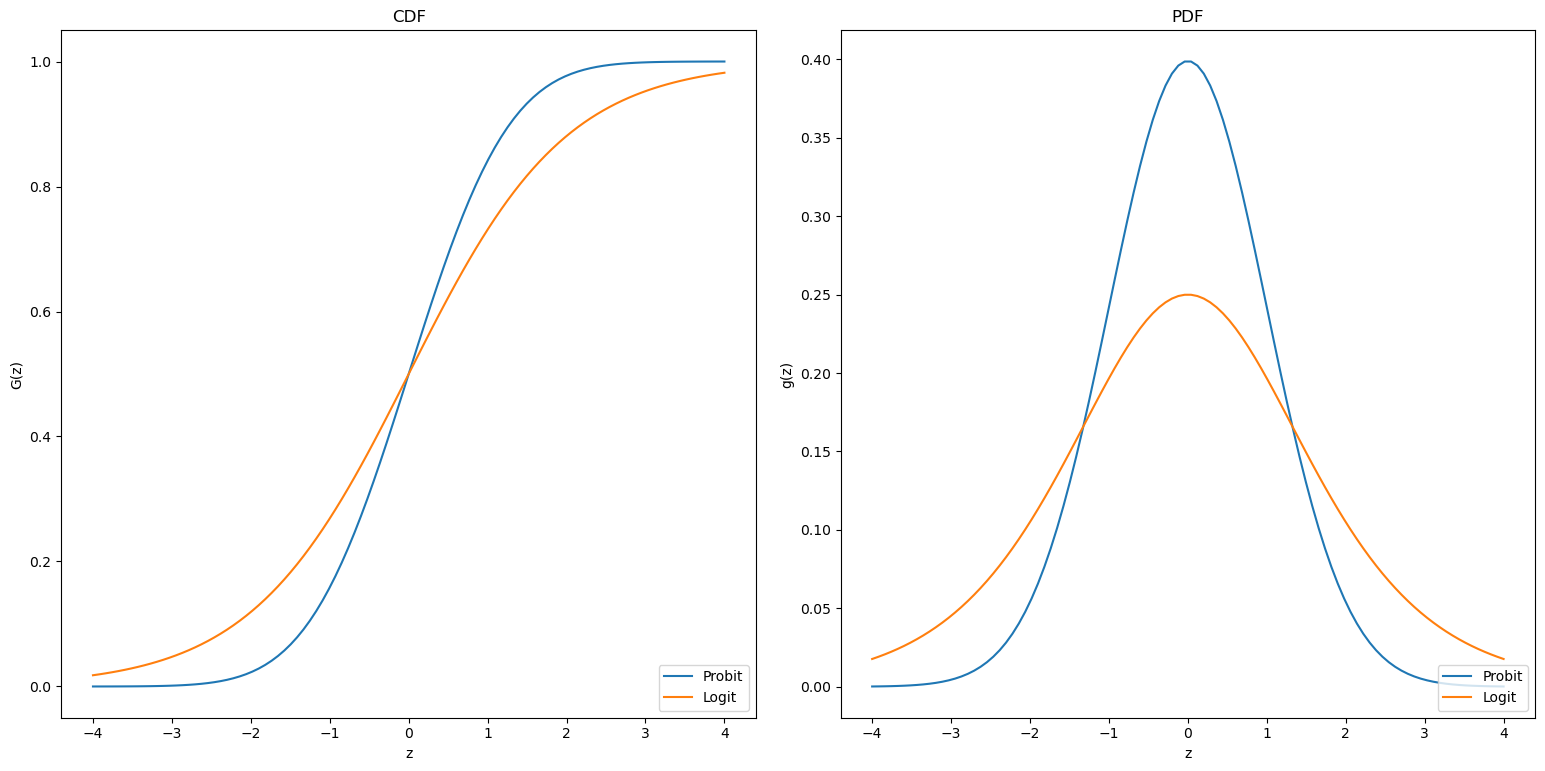

In [10]:
plot_G(scale=1) 

###  Rescaled distributions
Calibrate to have identical density at 0 

When unscaled density is 0.4 for standard normal and 0.25 for standard logistic

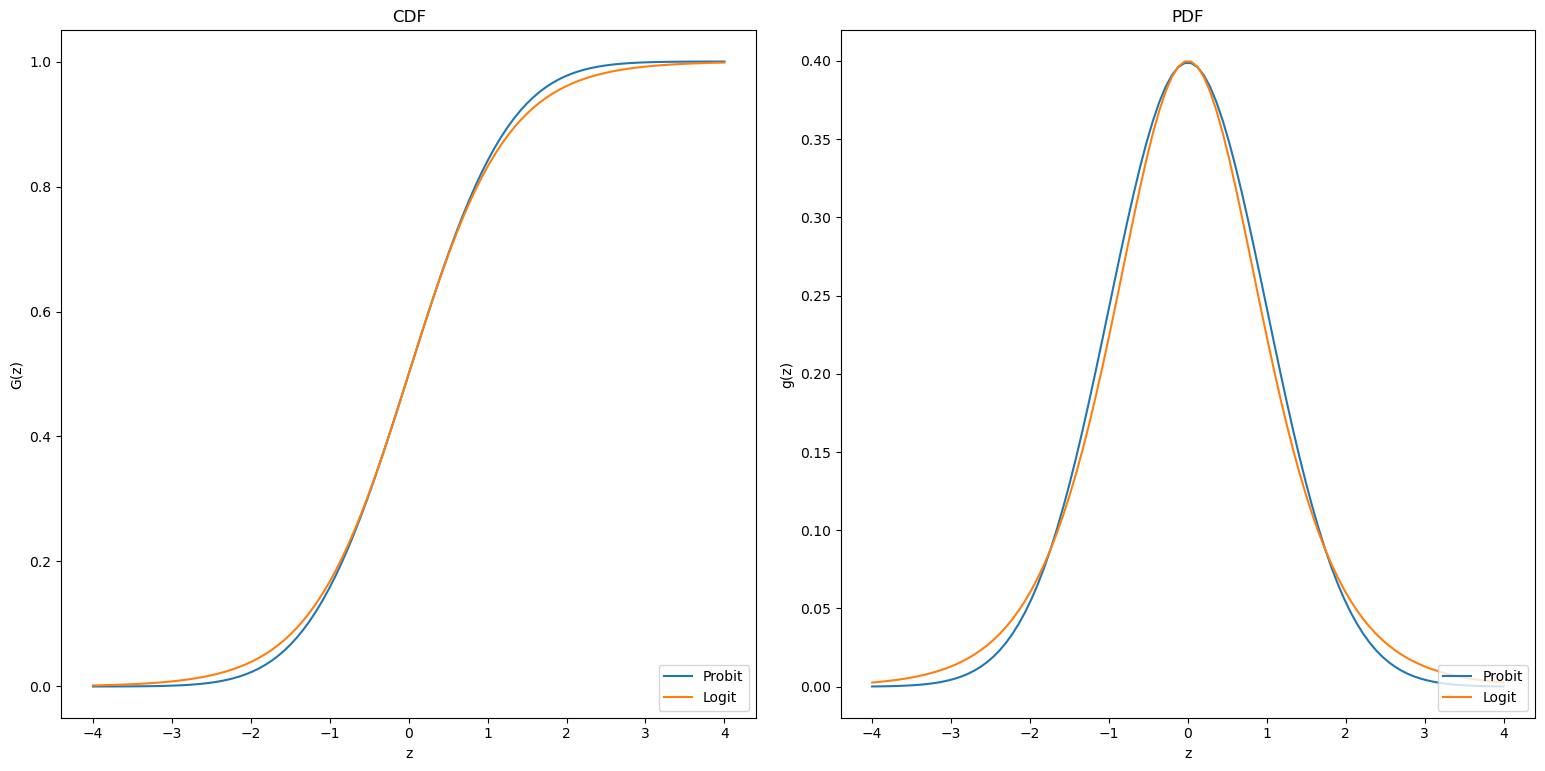

In [11]:
plot_G(scale=0.25/0.4)

### Probit or Logit
Both these choices implies $0<G(z)<1$ so that 
1. predictions of $P(y=1|x)$ are never outside the unit interval 
1. condtional variance $Var(y|x)$ is always positve

Logistic and normal distributions are very similar
- Both symmetric
- logistic distribution have longer tails
- The derivatibes $g(z)\equiv dG(z)/dz>0$  are both positive over infinite domain

Scale is different
- **Probit:** std. dev is $\sigma=1$
- **Logit :** std. dev is $\sigma \simeq \pi/\sqrt(3)=1.8137993642342178$
- but scale differences are irrelevant (and unidentified)
- .... and average partial effects and the ratio $\hat{\beta}_l/\hat{\beta}_k$ are similar across specifications





### Estimation: Likelihood contributions and derivatives
Given a random sample $\left\{ y_{i},x_{i}\right\}
_{i=1,..,N}$ we can compute the density of $y_i$ conditional on $x_i$

$$
f(y_i|x_i;\beta)=G(x_i\beta) ^{y_i}[1-G(x_i\beta) ] ^{1-y_i}
$$

log likelihood for observation i

$$
\ell_i(\beta)=y_i \log[G(x_i\beta)] + (1-y_i)\log[1-G(x_i\beta)]
$$

sample log-Likelihood function

\begin{equation*}
\log\mathcal{L(\beta)}=N^{-1}\sum_{i=1}^{N} \ell_i(\beta)
\end{equation*}
The $1 \times K$ vector of derivatives for the conditional likelihood contribution can be expressed as

$$
\nabla_{\beta} \ell_i(\beta)= \frac{g(x_i\beta)x_i y_i}{G(x_i\beta)} - \frac{g(x_i\beta)x_i (1-y_i)}{1-G(x_i\beta)}
= \frac{g(x_i\beta)x_i [y_i-G(x_i\beta)]}{G(x_i,\beta)(1-G(x_i\beta))}
$$

### Python Implementation of log likelihood contributions and derivatives

In [12]:
def logl_i(y, x, beta, model='probit', out='logl'):
    beta=np.array(beta).reshape(-1,1)
    xb=x@beta        # Linear index xb=x1*b1+x2*b2+...+xK*bK
    Gx=G(xb, model)  # Response probability at x
    Gx=np.minimum(np.maximum(Gx,1e-15),1-1e-15)

    logl = np.log(Gx)*y + np.log(1-Gx)*(1-y)     # Nx1 vector of log-likelihood contributions
    if out=='logl': 
        return logl
    
    # Compute derivarives of logl wrt beta
    gx=g(xb, model)                              # Density at xb
    dlogl=gx*x*(y-Gx)/( Gx* (1-Gx))              # NxK matrix of derivatives of logl
 
    if out=='dlogl': 
        return dlogl

    if out=='all':         
        return xb, Gx, gx, logl, dlogl

beta0=np.array([ 0.42545195, -0.02134517,  0.22117037,  0.20586954, -0.0031541 , -0.08802437, -1.44335402,  0.06011226]).reshape(-1,1)
print(beta0)
print(x.shape)
#(logl_i(y, x, beta0));


[[ 0.42545195]
 [-0.02134517]
 [ 0.22117037]
 [ 0.20586954]
 [-0.0031541 ]
 [-0.08802437]
 [-1.44335402]
 [ 0.06011226]]
(753, 8)


### Maximum Likelihood (an M-Estimator)
We can trivially turn the maximization problem involved in MLE into a minimization problem 

\begin{eqnarray*}
\hat{\beta}_{MLE}
&=&\arg \max_{\beta} N^{-1}\sum_{i=1}^{N} \log f(y_i|x_i;\beta) \\
&=&\arg \min_{\theta}  N^{-1}\sum_{i=1}^{N} q(w_i, \theta)
\end{eqnarray*}
where we take 
- $w_i=(x_i,y_i)$ as the observed data for unit i
- $\theta=\beta$ as the parameters to estimate
- $q(w_i, \theta)=-\log f(y_i|x_i;\beta)=-\ell_i(\beta)$ as the objective function whose expectation we wish to minimize



### Python Implementation of $\hat{\beta}_{MLE}$

In [13]:
from scipy.optimize import minimize

def estim_mle(y, x, model, use_grad=1):
    x = np.array(x)
    N,k=x.shape    
    y = np.array(y).reshape(N, 1)

    # objective function is negative of mean log-likelihood 
    q=lambda beta:    - np.mean(logl_i(y, x,beta, model));

    beta_start=np.zeros((k,1));  # use vector of zeros starting values   
    
    if use_grad==0: 
        out=minimize(q, x0=beta_start) 
    
    if use_grad==1: 
        grad=lambda beta: - np.mean(logl_i(y, x,beta, model, out='dlogl'), axis=0);
        out=minimize(q, x0=beta_start, jac=grad)
        
    return out

### Output from minimize

In [14]:
model='logit'
out=estim_mle(y, x, model, use_grad=1)
display(out)

      fun: 0.5335526575489804
 hess_inv: array([[ 5.50685656e+02,  5.61909246e-01, -1.66577680e+01,
        -3.10351858e+00,  1.18381597e-01, -7.05986737e+00,
        -4.05125350e+01, -2.15702309e+01],
       [ 5.61909246e-01,  4.50366173e-02, -1.01992400e-01,
        -1.85498551e-03,  5.04485027e-04, -7.06271603e-03,
         1.34514397e-01, -9.57380331e-03],
       [-1.66577680e+01, -1.01992400e-01,  1.41318075e+00,
        -6.10039512e-02,  1.98291031e-03,  3.76307781e-02,
        -1.09774238e+00,  2.89478075e-01],
       [-3.10351858e+00, -1.85498551e-03, -6.10039512e-02,
         8.30768986e-01, -2.54178809e-02, -1.08867953e-02,
        -1.80713614e-01,  1.83240098e-01],
       [ 1.18381597e-01,  5.04485027e-04,  1.98291031e-03,
        -2.54178809e-02,  9.13613145e-04, -1.06832775e-03,
         2.24709176e-03, -1.45051188e-03],
       [-7.05986737e+00, -7.06271603e-03,  3.76307781e-02,
        -1.08867953e-02, -1.06832775e-03,  1.49579447e-01,
         9.86704745e-01,  2.54849561

### Output from minimize converted into estimation output

In [15]:
model='logit'
out=estim_mle(y, x, model, use_grad=1)
print(out.keys())
print('messsage:', out.message)
print('minimize used %d iterations, %d function evaluations and %d evaluations of the jacobian' %  
      (out.nit, out.nfev, out.njev))
N=len(y)
se=np.sqrt(np.diag(out.hess_inv/N));  # standard errors (square rooot of diaginal of Avar=Hinv/N)
table={"":x.columns, "bhat ": out.x, "se ":  se , "t-value ": out.x/se}
print('\nParameter estimates from', model, '\n',tabulate(table, headers="keys",floatfmt="10.4f"))
print('mean logl %g' % -out.fun)
print('\ng*Hinv*g.T: Chi-Square test for gradients beein zero\n', out.jac@ out.hess_inv @out.jac.T)
print('\njac: derivative of (negative of) likehood wrt beta\n', out.jac)
# print(out)

dict_keys(['fun', 'jac', 'hess_inv', 'nfev', 'njev', 'status', 'success', 'message', 'x', 'nit'])
messsage: Optimization terminated successfully.
minimize used 31 iterations, 37 function evaluations and 37 evaluations of the jacobian

Parameter estimates from logit 
                bhat          se     t-value
--------  ----------  ----------  ----------
const         0.4255      0.8552      0.4975
nwifeinc     -0.0213      0.0077     -2.7600
educ          0.2212      0.0433      5.1054
exper         0.2059      0.0332      6.1980
expersq      -0.0032      0.0011     -2.8635
age          -0.0880      0.0141     -6.2455
kidslt6      -1.4434      0.1915     -7.5384
kidsge6       0.0601      0.0706      0.8512
mean logl -0.533553

g*Hinv*g.T: Chi-Square test for gradients beein zero
 1.1916952422296018e-15

jac: derivative of (negative of) likehood wrt beta
 [ 1.94556160e-09  1.38714392e-07  3.33207428e-08 -1.39479045e-09
 -6.16108466e-07  7.34437167e-08  4.19990598e-09  1.17214694e-08]


### Inference
For inference we use the expectation of the Hessian
$$
\text{Avar}(\hat{\beta})=-A_0/N=-E[H(x_i,\beta_0)]/N
$$


To obtain the $K \times K$ Hessian matrix of the likelihood we differentiate once more and obtain
$$
H(x_i,\beta)
= -\frac{g(x_i,\beta)^2 x'_i x_i}{G(x_i,\beta)(1-G(x_i,\beta))} + [y_i-G(x_i,\beta)]L(x_i, \beta)
$$
where $L(x_i, \beta)$ in the last term is a complicated function of $x_i$ but has expectation 0 when likelihood is maximized. So we have
$$
-E[H(x_i,\beta_0)|x_i]= A(x_i, \beta_0)= \frac{g(x_i,\beta_0)^2 x'_i x_i}{G(x_i,\beta_0)(1-G(x_i,\beta_0))}
$$

We can then obtain an estimate of $\text{Avar}(\beta)$ as
$$
\widehat{\text{Avar}(\hat{\beta})}
=\left\{ N^{-1}\sum_{i=1}^N A(x_i, \beta)^{-1}\right\} /N
= \left\{ 
\sum_{i=1}^N
\frac{g\left(x_i,\hat{\beta}\right)^2 x'_i x_i}{G(x_i,\hat{\beta})(1-G(x_i,\hat{\beta}))} 
\right\}^{-1} 
$$

### Python Implementation $\widehat{\text{Avar}(\hat{\beta})}$

In [16]:
# derivatives of likelihood contribution
def avar(y, x, beta, model, cov_type='Ainv'):
    x = np.array(x)
    N,k=x.shape    
    y = np.array(y).reshape(N, 1)
    beta = np.array(beta).reshape(k, 1)

    xb, Gx, gx, logl, dlogl  = logl_i(y, x, beta, model, out='all')
    A=(gx*x).T @(gx*x/(Gx* (1-Gx)))
    if cov_type=='Ainv':
        return la.inv(A)    

    B=(dlogl).T @ dlogl # equals outer product of scores [sum_i(s_i*s_i')]
    if cov_type=='Binv':
        return la.inv(B)
    if cov_type=='sandwich':
        return la.inv(A) @ B @ la.inv(A)

bhat=out.x
print('Standard errors')
for cov_type in ['Ainv', 'Binv', 'sandwich']:
    V=avar(y, x, bhat, model, cov_type)
    se= np.sqrt(np.diag(V))
    print(cov_type, se.round(5))


Standard errors
Ainv [0.86037 0.00842 0.04344 0.03206 0.00102 0.01457 0.20358 0.07479]
Binv [0.86335 0.00784 0.04273 0.03203 0.00103 0.01479 0.20513 0.07043]
sandwich [0.85916 0.00907 0.04442 0.03227 0.00101 0.01443 0.20303 0.07983]


### Compare results with and without analytical derivatives

In [17]:
# Output from minimize with and without derivatives
res_p_nograd=estim_mle(y,x,model, use_grad=0)
res_p=estim_mle(y,x,model, use_grad=1)
print('number of iterations - with gradients    : ', res_p.nit)
print('number of iterations - without gradients : ', res_p_nograd.nit)
print('number of function evaluations - with gradients   : ', res_p.nfev)
print('number of function evaluations - without gradients: ', res_p_nograd.nfev)
print('number of function evaluations - without gradients/(1+# of parameters): ', res_p_nograd.nfev/9)

number of iterations - with gradients    :  31
number of iterations - without gradients :  31
number of function evaluations - with gradients   :  37
number of function evaluations - without gradients:  333
number of function evaluations - without gradients/(1+# of parameters):  37.0


### Replicate results in Example 15.2 (Wooldridge, p. 580)
Table 15.1: LPM, Logit and Probit Estimates of of Labor Force Participation

In [18]:
# LPM estimated by OLS: 
beta_lpm=la.inv(x.T@x)@x.T@y  

# Estimate probit and logit using MLE 
for model in ["probit", "logit"]:
    out[model]=estim_mle(y,x,model)
    out[model].beta=out[model].x
    out[model].avar=avar(y, x, out[model].beta, model, cov_type='Ainv')
    out[model].se=np.sqrt(np.diag(out[model].avar))
    
# Table with parameter estimates
table={"":x.columns,"bhat (lpm)": beta_lpm, "se(lpm)": out_lpm.bse, 
       "bhat (probit)": out['probit'].beta, "se(probit)": out['probit'].se,  
       "bhat (logit)": out['logit'].beta, "se(logit)": out['logit'].se}  
print('\nParameter Estimates\n', tabulate(table, headers="keys",floatfmt="10.3f"))



Parameter Estimates
             bhat (lpm)     se(lpm)    bhat (probit)    se(probit)    bhat (logit)    se(logit)
--------  ------------  ----------  ---------------  ------------  --------------  -----------
const            0.586       0.151            0.270         0.508           0.425        0.860
nwifeinc        -0.003       0.002           -0.012         0.005          -0.021        0.008
educ             0.038       0.007            0.131         0.025           0.221        0.043
exper            0.039       0.006            0.123         0.019           0.206        0.032
expersq         -0.001       0.000           -0.002         0.001          -0.003        0.001
age             -0.016       0.002           -0.053         0.008          -0.088        0.015
kidslt6         -0.262       0.032           -0.868         0.118          -1.443        0.204
kidsge6          0.013       0.013            0.036         0.044           0.060        0.075


### Goodness of fit

In [19]:
from scipy.stats import chi2

# Log-likelihood and Pseudo-R-squared
const=np.array(x['const']).reshape(-1,1)
N=len(y)
for model in ["probit", "logit"]:
    onlyconst=estim_mle(y,const,model, use_grad=1)
    out[model].logl0=-onlyconst.fun*N        # log-likelihood at restricted model (only constant)

    out[model].logl=-out[model].fun*N  # log-likelihood at unrestricted model (estimated above)
    out[model].R2=1.0-out[model].logl/out[model].logl0 # Pseudo R-squred

    
r=np.array(y)-np.array(x)@bhat_lpm
R2_lpm=1-sum(r**2)/sum((y-np.mean(y))**2)
df=out[model].beta.size-1 # degrees of freedom for LR test
crit=chi2.ppf(0.95,df) # cirtical value (5 pct significance level)
print('crit', crit)

table={"":["Log-likelihood", "Log-likelihood (only constant)",  "LR test", "Chi Square Critical value (df=%d)" % df, "Pseudo R^2"], 
       "lpm " :   ["", "", "", "", R2_lpm.round(5)],
       "logit " : [out['logit'].logl, out['logit'].logl0, 2*(out['logit'].logl-out['logit'].logl0), crit, out['logit'].R2 ],
       "probit " :[out['probit'].logl, out['probit'].logl0, 2*(out['probit'].logl-out['probit'].logl0), crit, out['probit'].R2]}

print(tabulate(table, headers="keys",floatfmt="10.3f"))
print("\nNumber of observartions, N=%i\n" % N)

 

crit 14.067140449340169
                                  lpm          logit      probit
--------------------------------  -------  ----------  ----------
Log-likelihood                               -401.765    -401.302
Log-likelihood (only constant)               -514.873    -514.873
LR test                                       226.216     227.142
Chi Square Critical value (df=7)               14.067      14.067
Pseudo R^2                        0.26422       0.220       0.221

Number of observartions, N=753



### Partial Effects - computation

**Discrete change**

\begin{equation*}
PE_{\Delta x_{k}}\left( x^{0}\right) =P\left(
y=1|x_{1}^{0},x_{2}^{0},..,x_{k}^{0}+\Delta x_{k}^{0},..,x_{K}^{0}\right)
-P\left( y=1|x^{0}\right) 
\end{equation*}

If $x_{k}$ is a dummy variable: $x_{k}=0$, $\Delta x_{k}=1$%

Remark: If $x_{k}$ is continuous, then we often take effect relative to $%
\Delta x_{k}$.%

**Marginal Change**

\begin{equation*}
\left. \frac{\partial P\left( y=1|x\right) }{\partial x_{k}}\right \vert
_{x=x^{0}}=\underset{\text{density, }>0}{\underbrace{g\left( x^{0}\beta \right) }}\beta _{k}\text{, where }g\left( z\right) =\frac{\partial G}{%
\partial z}
\end{equation*}



### Partial Effects - identification
**Scale of $\beta $ or $G$ is irrelevant for the partial effects.**

Suppose $P\left( y=1|x\right) =G\left( x\beta \right) =\tilde{G}\left(
x\beta /\sigma \right) $

\begin{equation*}
\left. \frac{\partial P\left( y=1|x\right) }{\partial x_{k}}\right \vert
_{x=x^{0}}=\underset{\text{density, }>0}{\underbrace{\tilde{g}\left(
x^{0 }\beta /\sigma \right) }}\beta _{k}/\sigma \text{, where }\tilde{g} \left( z\right) =\frac{\partial \tilde{G}}{\partial z}
\end{equation*}

- Partial effect only depends on $\beta /\sigma $- which is what we can
identify
- Hence, the normalization $\sigma =1$ is without loss of generality - if interest is in the partial effect
- $\beta _{j}$ determines the sign of partial effect (in binary choice
models)



### Partial Effects

In LPM - partial effects are always equal to $\beta _{j}$

In LVM - $\beta _{j}$ determines the sign of partial effects - but magnitude depends on $x^{0}$

Which $x^{0}$ to choose?

1. $x^{0}$ sample mean of $x$
2. sample enumeration (evaluate PE at the data and take the sample average)

APE and PEA may be very different since $p(x) $ is nonlinear (example on next slide)
- 1) estimates *partial effect at the average* (PEA)
- 2) estimates *average partial effect* (APE)



### Partial effect as function of $x_1$
Suppose $\beta _{1}<0$
![title](img/partial.png)

### LPM is often a good approximation of APE
* $\hat{\beta}_{LPM}=(x'x)^{-1}x'y$ can be a good approximation of average partial effects (APE)
* if both $x$ and $\varepsilon$ are normally LPM is asymptotically  equivalent to APE for probit
* LPM inadequate if interest lies in the distribution of partial effects

  beta, true    parameter estimate, bhat_lpm    Avereage partial effects, APE
------------  ------------------------------  -------------------------------
           0                         0.49896                          0
           1                         0.28365                          0.28213


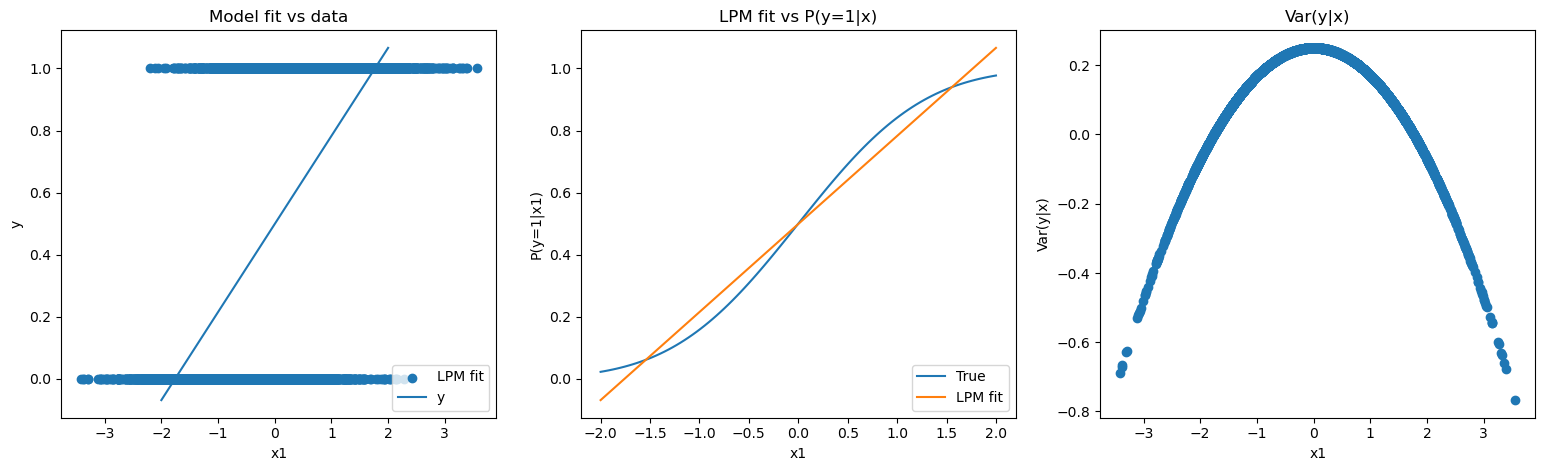

In [20]:
# Estimate LPM using OLS and compare to APE (using our simulated data from above)
bhat_simdata_lpm=la.inv(x_sim.T@x_sim)@x_sim.T@y_sim
APE_simdata=np.mean(norm.pdf(x_sim@beta))*beta
table={"beta, true": beta, "parameter estimate, bhat_lpm": bhat_simdata_lpm.round(5), "Avereage partial effects, APE": APE_simdata.round(5)}
print(tabulate(table, headers="keys"))
plot_lpmfit(y_sim, x_sim, beta)

### Partial Effects in our empirical example 

In [21]:
# Estimate LPM using OLS and compare to APE (using our data on labor force participation)
bhat_lpm=la.inv(x.T@x)@x.T@y 

for model in ["probit", "logit"]:
    out[model].APE = np.mean(g(x@out[model].beta, model))*out[model].beta
    out[model].PEA = g(np.mean(x,axis=0)@ out[model].beta, model)*out[model].beta

table={"":x.columns[1:],
        "lpm": bhat_lpm[1:], 
       "logit": out['logit'].beta[1:], 
       "probit": out['probit'].beta[1:],
       "APE (logit)":  out['logit'].APE[1:], 
       "APE (probit)": out['probit'].APE[1:],
       "PEA (logit)":  out['logit'].PEA[1:], 
       "PEA (probit)": out['probit'].PEA[1:]}

print(tabulate(table, headers="keys",floatfmt="10.3f"))

                 lpm       logit      probit    APE (logit)    APE (probit)    PEA (logit)    PEA (probit)
--------  ----------  ----------  ----------  -------------  --------------  -------------  --------------
nwifeinc      -0.003      -0.021      -0.012         -0.004          -0.004         -0.005          -0.005
educ           0.038       0.221       0.131          0.039           0.039          0.054           0.051
exper          0.039       0.206       0.123          0.037           0.037          0.050           0.048
expersq       -0.001      -0.003      -0.002         -0.001          -0.001         -0.001          -0.001
age           -0.016      -0.088      -0.053         -0.016          -0.016         -0.021          -0.021
kidslt6       -0.262      -1.443      -0.868         -0.258          -0.261         -0.351          -0.339
kidsge6        0.013       0.060       0.036          0.011           0.011          0.015           0.014


### Scaling of parameters
**Logit**

$PE_{x_{k}}^{L}\left( x^{0}\right) =\beta _{k}^{L}\left. \frac{\partial \Lambda }{\partial z}\right \vert _{z=x^{0\prime }\beta }=\beta
_{k}^{L}\frac{\exp \left( x^{0}\beta ^{L}\right) }{\left[ 1+\exp
\left( x^{0 }\beta ^{L}\right) \right] ^{2}}$

**Probit:**

$PE_{x_{k}}^{P}\left( x^{0}\right) =\beta _{k}^{P}\phi \left(
x^{0}\beta ^{P}\right) $


We can "Calibrate" at coefficients to have same partial effect at $x^0\beta =0$
\begin{eqnarray*}
PE_{x_{k}}^{L}\left( 0\right) &=&\beta _{k}^{L}\frac{1}{4} \\
PE_{x_{k}}^{L}\left( 0\right) &=&\beta _{k}^{P}\frac{1}{\sqrt{2\pi }}
\end{eqnarray*}

\begin{equation*}
\beta _{k}^{L}\frac{1}{4}\simeq \beta _{k}^{P}\frac{1}{\sqrt{2\pi }}
\Rightarrow \beta _{k}^{L}\simeq \beta _{k}^{P}\frac{4}{\sqrt{2\pi }}
=1.60\cdot \beta _{k}^{P}
\end{equation*}

In [22]:
scale=4/np.sqrt(2*np.pi)
table={"":x.columns,
       "bhat (lpm)":    bhat_lpm.round(5), 
       "bhat (logit)":  out['logit' ].x ,  
       "bhat (probit)": out['probit'].x ,
       "bhat (logit) / scale": out['logit'].x/ scale }
print('\nUnscaled and scaled coefficients\n', tabulate(table, headers="keys",floatfmt="10.3f"))
print('\nScale', scale)



Unscaled and scaled coefficients
             bhat (lpm)    bhat (logit)    bhat (probit)    bhat (logit) / scale
--------  ------------  --------------  ---------------  ----------------------
const            0.586           0.425            0.270                   0.267
nwifeinc        -0.003          -0.021           -0.012                  -0.013
educ             0.038           0.221            0.131                   0.139
exper            0.039           0.206            0.123                   0.129
expersq         -0.001          -0.003           -0.002                  -0.002
age             -0.016          -0.088           -0.053                  -0.055
kidslt6         -0.262          -1.443           -0.868                  -0.904
kidsge6          0.013           0.060            0.036                   0.038

Scale 1.5957691216057308


### The relative size of coefficients on two different variables does not depend on scale


In [23]:
table={"":x.columns,
       "bhat (lpm)":    bhat_lpm/bhat_lpm[2], 
       "bhat (logit)":  out['logit' ].x/out['logit' ].x[2] , 
       "bhat (probit)": out['probit'].x/out['probit'].x[2]}
print('\nCoefficients relative to coefficent on educ\n', tabulate(table, headers="keys",floatfmt="10.4f"))


Coefficients relative to coefficent on educ
             bhat (lpm)    bhat (logit)    bhat (probit)
--------  ------------  --------------  ---------------
const          15.4103          1.9236           2.0632
nwifeinc       -0.0896         -0.0965          -0.0919
educ            1.0000          1.0000           1.0000
exper           1.0394          0.9308           0.9423
expersq        -0.0157         -0.0143          -0.0144
age            -0.4235         -0.3980          -0.4037
kidslt6        -6.8906         -6.5260          -6.6333
kidsge6         0.3425          0.2718           0.2750


### Some takeaways on LPM, probit and Logit

- Probit and logit is very similar
    - logistic and normal distributions are very similar (both symmetric, although logistic distribution have longer tails)
    - partial effects and ratio between parameter estimates very similar     
    - latent variable model requires scale normalization to obtain identification
    - usually estimated using MLE

- LPM 
    - easy to estimate (OLS)
    - easy to allow for endgeonous variables, unobserved effects, dynamics, etc
    - prediction of $P(y=1|x)$ can fall outside [0,1] and Var$(\varepsilon|x)$ can be negative
    - assumes constant partial effects which is very unrealistic
    - ....but LPM is often a good approximation of APE
 